<a href="https://colab.research.google.com/github/fedhere/FDSFE_FBianco/blob/main/classdemo/FSDfE_dbscan_26Oct23_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

<ipython-input-29-2ebfe80d68ca>:7: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



# Get Kaggle dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!chmod 600 /content/drive/MyDrive/Kaggle/kaggle.json

import json
envs = json.load(open("/content/drive/MyDrive/Kaggle/kaggle.json", "r"))

import os
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!kaggle datasets list -s chocolate

ref                                                          title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rtatman/chocolate-bar-ratings                                Chocolate Bar Ratings                                30KB  2017-08-11 23:25:42          83178       1084  0.7647059        
andrewmvd/chocolate-ratings                                  Chocolate Ratings                                    73KB  2022-01-09 10:11:07           1852         47  1.0              
soroushghaderi/chocolate-bar-2020                            Chocolate Bar 2020                                   72KB  2020-04-19 05:09:47           4105         52  1.0              
evangower/chocolate-bar-ratings                              Chocolate Bar 

In [ ]:
!kaggle datasets download -d andrewmvd/chocolate-ratings -p /content/drive/MyDrive/Kaggle/chocolate

chocolate-ratings.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -o /content/drive/MyDrive/Kaggle/chocolate/chocolate-ratings.zip -d /content/drive/MyDrive/Kaggle/chocolate

Archive:  /content/drive/MyDrive/Kaggle/chocolate/chocolate-ratings.zip
  inflating: /content/drive/MyDrive/Kaggle/chocolate/chocolate_makers.csv  
  inflating: /content/drive/MyDrive/Kaggle/chocolate/chocolate_ratings.csv  


# Read dataset

In [ ]:
df_makers = pd.read_csv("/content/drive/MyDrive/Kaggle/chocolate/chocolate_makers.csv")
df_ratings = pd.read_csv("/content/drive/MyDrive/Kaggle/chocolate/chocolate_ratings.csv")

In [ ]:
df_makers

,COMPANY NAME,CITY,STATE/PROVINCE,OWNER/MAKER,COUNTRY
0,Choklat,Calgary,Alberta,Brad Churchill,Canada
1,Yukon Chocolate Company,Calgary,Alberta,Sydney Oland,Canada
2,Kin+Pod,Calgary,Alberta,Georden Spicer,Canada
3,Goldie,Calgary,Alberta,Amy Horne (instagram),Canada
4,Moth Chocolate,Calgary,Alberta,Geordan Spicer (mothchocolate.com),Canada
...,...,...,...,...,...
368,Tabal,Milwaukee,Wisconsin,Dan Bieser,US
369,Sjolinds,Mount Horeb,Wisconsin,Tracy Thompson,US
370,Del Sol,Viroqua,Wisconsin,Lynn Kronschnabel,US
371,Roots,Wisconsin Dells,Wisconsin,Lisa Nelson,US


In [ ]:
df_ratings

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00
...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80%,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75%,"3- B,S,C","strong nutty, marshmallow",3.75
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75%,"3- B,S,C","fatty, earthy, cocoa",3.00
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70%,"3- B,S,C","fatty, mild nuts, mild fruit",3.25


# Today we care about the "%Cocoa" and "Rating" columns

In [ ]:
X = df_ratings.loc[:, ["Cocoa Percent", "Rating"]]
X

,Cocoa Percent,Rating
0,76%,3.25
1,76%,3.50
2,76%,3.75
3,68%,3.00
4,72%,3.00
...,...,...
2525,80%,2.75
2526,75%,3.75
2527,75%,3.00
2528,70%,3.25


# Convert "Cocoa Percent" column from strings to fractions

In [ ]:
np.unique(X["Cocoa Percent"])

array(['100%', '42%', '46%', '50%', '53%', '55%', '56%', '57%', '58%',
       '60%', '60.5%', '61%', '62%', '63%', '64%', '65%', '66%', '67%',
       '68%', '69%', '70%', '71%', '71.50%', '72%', '72.5%', '73%',
       '73.5%', '74%', '75%', '76%', '77%', '78%', '79%', '80%', '81%',
       '82%', '83%', '84%', '85%', '86%', '87%', '88%', '89%', '90%',
       '91%', '99%'], dtype=object)

In [ ]:
X["Cocoa Percent"].unique()

array(['76%', '68%', '72%', '80%', '70%', '63%', '74%', '60%', '88%',
       '55%', '75%', '65%', '85%', '73%', '64%', '66%', '50%', '100%',
       '77%', '82%', '90%', '71%', '83%', '78%', '86%', '62%', '69%',
       '91%', '67%', '42%', '61%', '73.5%', '79%', '58%', '71.50%',
       '60.5%', '81%', '57%', '72.5%', '56%', '46%', '89%', '99%', '84%',
       '53%', '87%'], dtype=object)

In [ ]:
def convert_cocoa_percent_to_float(column):
    # return column.split("%")
    # return column.split("%")[0]
    # return float(column.split("%")[0])
    return float(column.split("%")[0]) / 100

In [ ]:
X["Cocoa Percent"].apply(convert_cocoa_percent_to_float)

0       0.76
1       0.76
2       0.76
3       0.68
4       0.72
        ... 
2525    0.80
2526    0.75
2527    0.75
2528    0.70
2529    0.72
Name: Cocoa Percent, Length: 2530, dtype: float64

In [ ]:
np.unique(X["Cocoa Percent"].apply(convert_cocoa_percent_to_float))

array([0.42 , 0.46 , 0.5  , 0.53 , 0.55 , 0.56 , 0.57 , 0.58 , 0.6  ,
       0.605, 0.61 , 0.62 , 0.63 , 0.64 , 0.65 , 0.66 , 0.67 , 0.68 ,
       0.69 , 0.7  , 0.71 , 0.715, 0.72 , 0.725, 0.73 , 0.735, 0.74 ,
       0.75 , 0.76 , 0.77 , 0.78 , 0.79 , 0.8  , 0.81 , 0.82 , 0.83 ,
       0.84 , 0.85 , 0.86 , 0.87 , 0.88 , 0.89 , 0.9  , 0.91 , 0.99 ,
       1.   ])

# Create new column in dataframe and drop the old one

In [ ]:
X["cocoa_fraction"] = X["Cocoa Percent"].apply(convert_cocoa_percent_to_float)
X

,Cocoa Percent,Rating,cocoa_fraction
0,76%,3.25,0.76
1,76%,3.50,0.76
2,76%,3.75,0.76
3,68%,3.00,0.68
4,72%,3.00,0.72
...,...,...,...
2525,80%,2.75,0.80
2526,75%,3.75,0.75
2527,75%,3.00,0.75
2528,70%,3.25,0.70


In [ ]:
X.drop(columns=["Cocoa Percent"], inplace=True)
X

,Rating,cocoa_fraction
0,3.25,0.76
1,3.50,0.76
2,3.75,0.76
3,3.00,0.68
4,3.00,0.72
...,...,...
2525,2.75,0.80
2526,3.75,0.75
2527,3.00,0.75
2528,3.25,0.70


# Visualize data (what are the axis labels, units?)

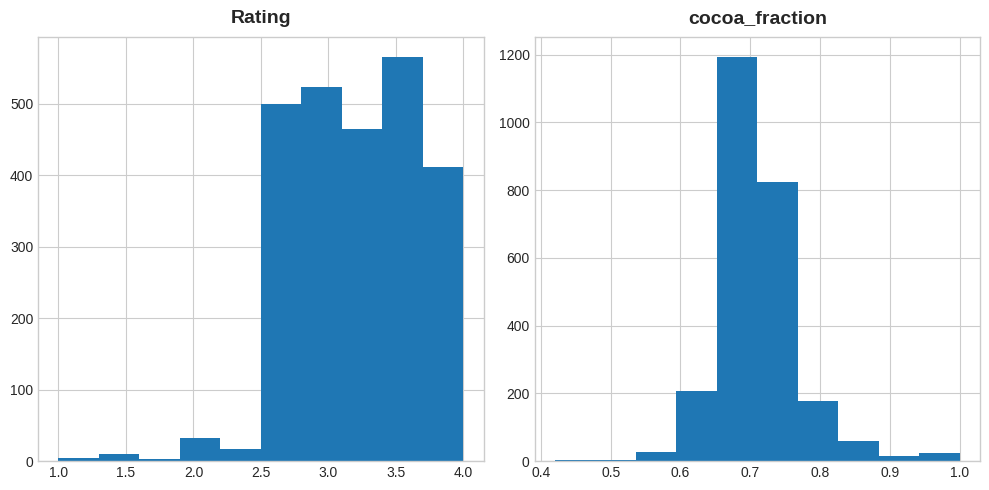

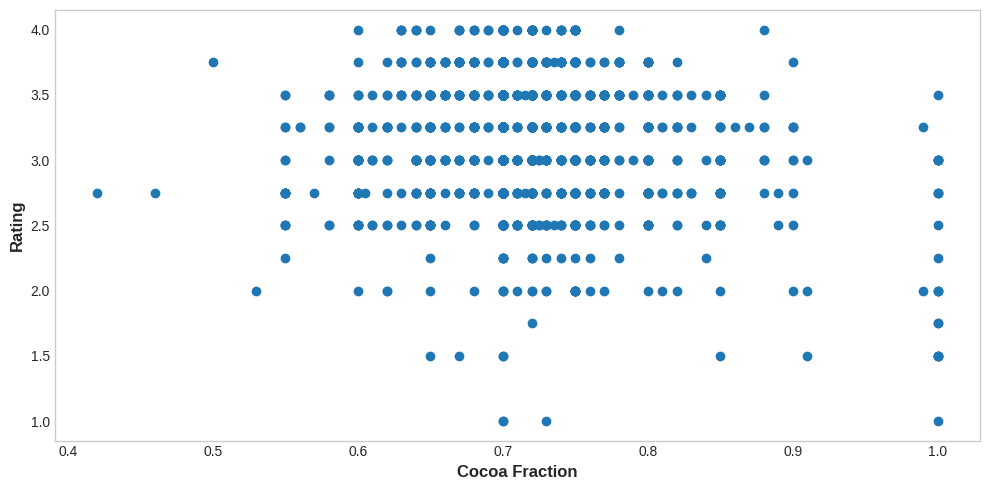

In [ ]:
X.hist(figsize=(10, 5))

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(X["cocoa_fraction"], X["Rating"])
ax.set_xlabel("Cocoa Fraction")
ax.set_ylabel("Rating")
ax.grid()
fig.show()

# Scale the data and visualize again

We scale the data with the exact same code from the KMeans lab from 24 October 2023.

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X[X.columns] = scaler.transform(X)
X.describe()

,Rating,cocoa_fraction
count,2.530000e+03,2.530000e+03
mean,-3.482502e-16,-1.741251e-15
std,1.000198e+00,1.000198e+00
min,-4.933018e+00,-5.278091e+00
25%,-4.409910e-01,-2.919936e-01
50%,1.205124e-01,-2.919936e-01
75%,6.820158e-01,4.203061e-01
max,1.805023e+00,5.050254e+00


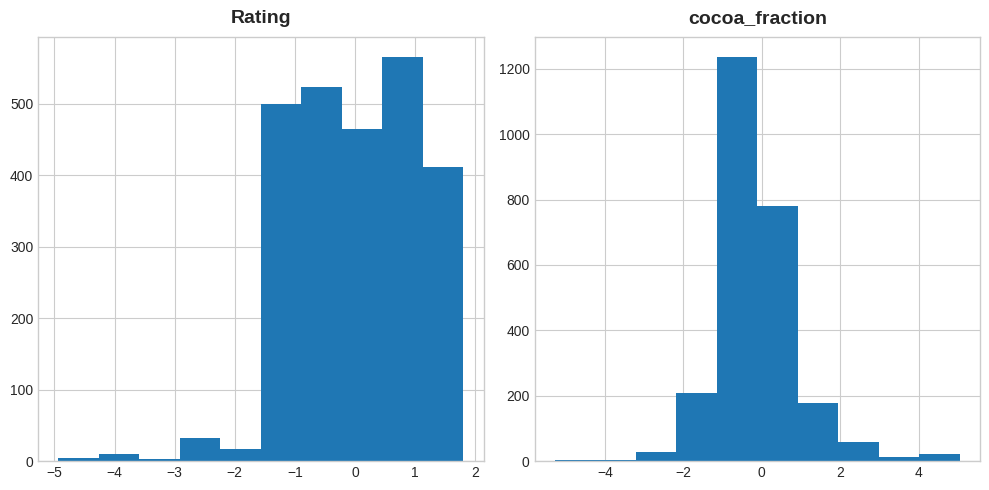

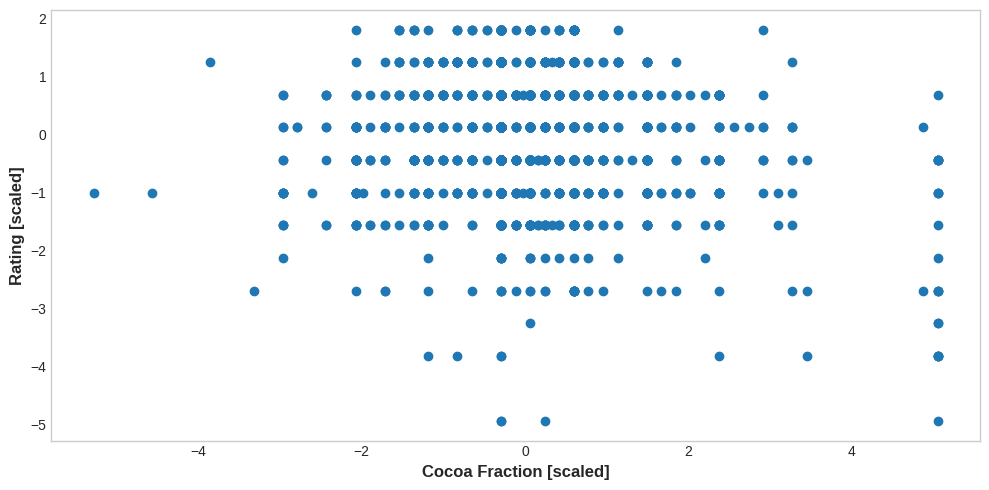

In [ ]:
X.hist(figsize=(10, 5))

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(X["cocoa_fraction"], X["Rating"])
ax.set_xlabel("Cocoa Fraction [scaled]")
ax.set_ylabel("Rating [scaled]")
ax.grid()
fig.show()

# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=1.1, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=1.1)

In [ ]:
dbscan.labels_, dbscan.labels_.shape

(array([0, 0, 0, ..., 0, 0, 0]), (2530,))

In [ ]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1]), array([   8, 2500,   22]))

In [ ]:
X["labels"] = dbscan.labels_

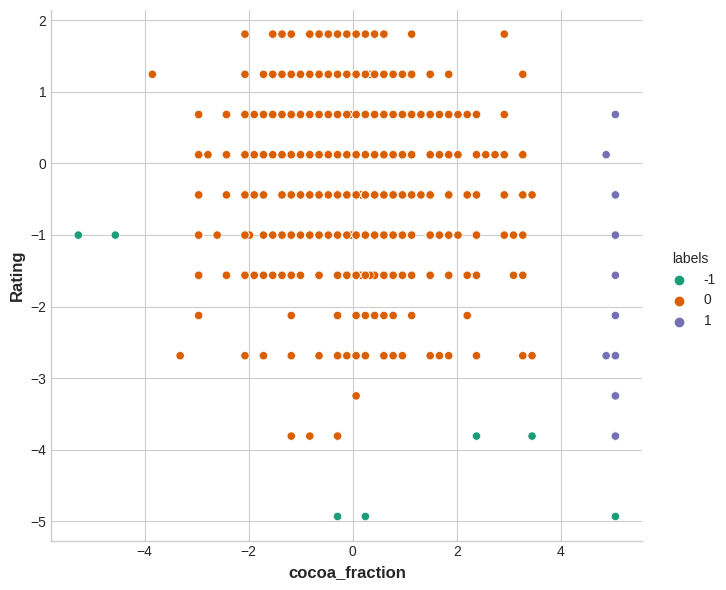

In [ ]:
ax = sns.relplot(
    x="cocoa_fraction", y="Rating",
    hue="labels", data=X,
    height=6,
    palette="Dark2",
    legend="full",
)
leg = ax._legend
leg.set_bbox_to_anchor([1.1, 0.5])

# Adding more features to the dataset

In [ ]:
X = df_ratings.loc[:, ["Cocoa Percent", "Rating", "Review Date"]]
X["cocoa_fraction"] = X["Cocoa Percent"].apply(convert_cocoa_percent_to_float)
X.drop(columns=["Cocoa Percent"], inplace=True)

scaler = StandardScaler()
scaler.fit(X)
X[X.columns] = scaler.transform(X)
X.describe()

,Rating,Review Date,cocoa_fraction
count,2.530000e+03,2.530000e+03,2.530000e+03
mean,-3.482502e-16,-2.136122e-14,-1.741251e-15
std,1.000198e+00,1.000198e+00,1.000198e+00
min,-4.933018e+00,-2.110736e+00,-5.278091e+00
25%,-4.409910e-01,-5.984420e-01,-2.919936e-01
50%,1.205124e-01,1.577049e-01,-2.919936e-01
75%,6.820158e-01,9.138519e-01,4.203061e-01
max,1.805023e+00,1.669999e+00,5.050254e+00


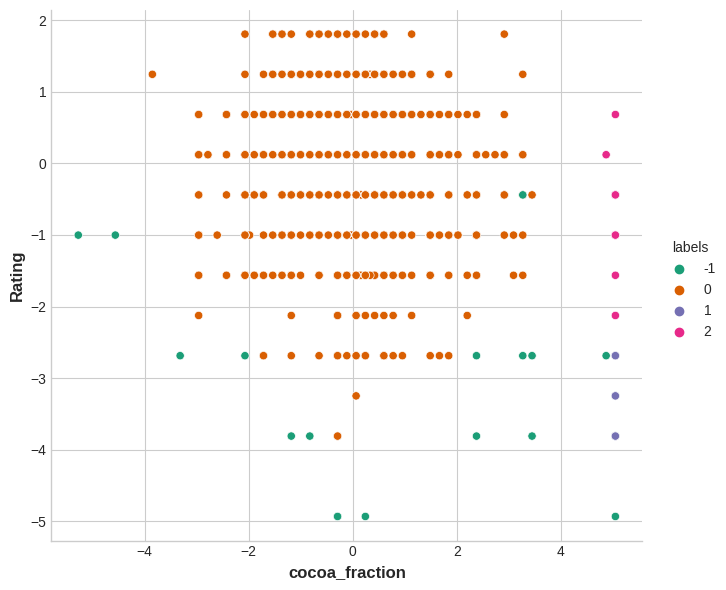

In [ ]:
dbscan = DBSCAN(eps=1.1, min_samples=5).fit(X)
X["labels"] = dbscan.labels_

ax = sns.relplot(
    x="cocoa_fraction", y="Rating",
    hue="labels", data=X,
    height=6,
    palette="Dark2",
    legend="full",
)
leg = ax._legend
leg.set_bbox_to_anchor([1.1, 0.5])

In [ ]:
import plotly.express as px

fig = px.scatter_3d(X, x='cocoa_fraction', y='Rating', z='Review Date',
                    hover_name="labels",
                    color='labels', color_discrete_sequence=px.colors.qualitative.Safe)
fig.update_traces(marker={'size': 3})
fig.show()